In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
sns.set()

In [2]:
#Reading the DataSet
data = pd.read_csv("E:\Python All in One\DATA_SETS\Machine Learning A-Z Template Folder\Part 3 - Classification\Section 15 - K-Nearest Neighbors (K-NN)\K_Nearest_Neighbors\Social_Network_Ads.csv")

In [3]:
#Separating the Dependent and Independent Variables
x = data.iloc[:, 2:4].values
y = data.iloc[:, 4].values

In [4]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [5]:
#Splitting the Train Set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [41]:
#Building and fitting the model
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',  random_state=0, gamma='auto')
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [42]:
#Predicting the Values
y_pred = classifier.predict(x_test)

In [43]:
#Evaluating our model
score = classifier.score(x_test, y_test)*100
print(score)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

93.0
[[64  4]
 [ 3 29]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


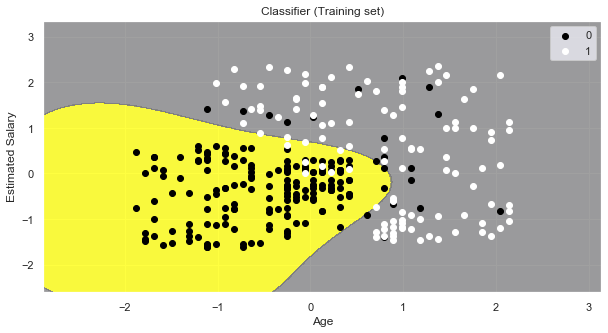

In [44]:
#Visualizing the training dataset
import seaborn as sns
sns.set()
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x[:,0].min()-1, stop = x[:, 0].max()+1, step = 0.01), 
                     np.arange(start = x[:,1].min()-1, stop = x[:, 1].max()+1, step = 0.01)
                    
                    )
pt.figure(figsize = (10,5))
pt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'Grey')))
pt.xlim(x1.min(), x1.max())
pt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    pt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
pt.title('Classifier (Training set)')
pt.xlabel('Age')
pt.ylabel('Estimated Salary')
pt.legend()
pt.show()